In [21]:
%load_ext autoreload
%autoreload 2

import os
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(os.path.abspath('..'))
# ---------------------------------
from time import sleep
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
y = pd.read_csv('../data/train.csv', index_col='id')['target'].values.astype('float')
x_xdeepfm = np.load('../tmp/xdeepfm/4293006264stacking1.npy')
x_deepfm = np.load('../tmp/deepfm/1615107092stacking1.npy')

In [4]:
x_xdeepfm = np.mean(x_xdeepfm, axis=1)
x_deepfm = np.mean(x_deepfm, axis=1)

xdeepfm = pd.DataFrame({'x': x_xdeepfm, 'y': y})
deepfm = pd.DataFrame({'x': x_deepfm, 'y': y})

In [59]:
score = []
sp = KFold(n_splits=60, random_state=23333, shuffle=False)
for train_idx, valid_idx in sp.split(xdeepfm['x'], xdeepfm['y']):
    s = roc_auc_score(xdeepfm['y'][valid_idx], xdeepfm['x'][valid_idx])
    score.append(s)

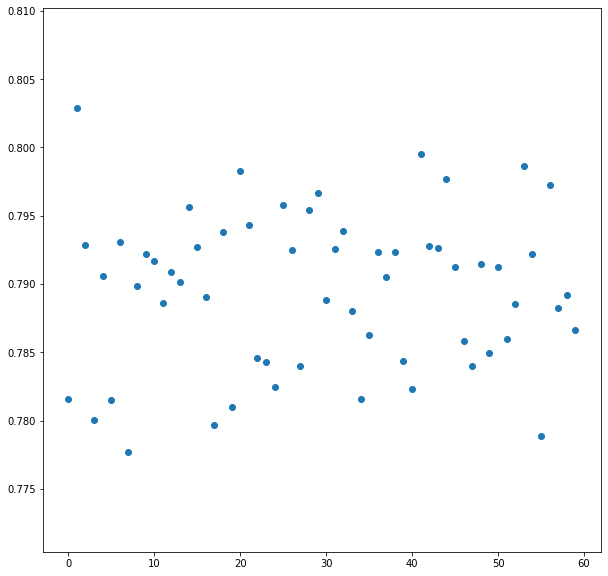

In [60]:
plt.figure(figsize=[10, 10])
plt.scatter([i for i in range(60)], score)